Automatically created module for IPython interactive environment


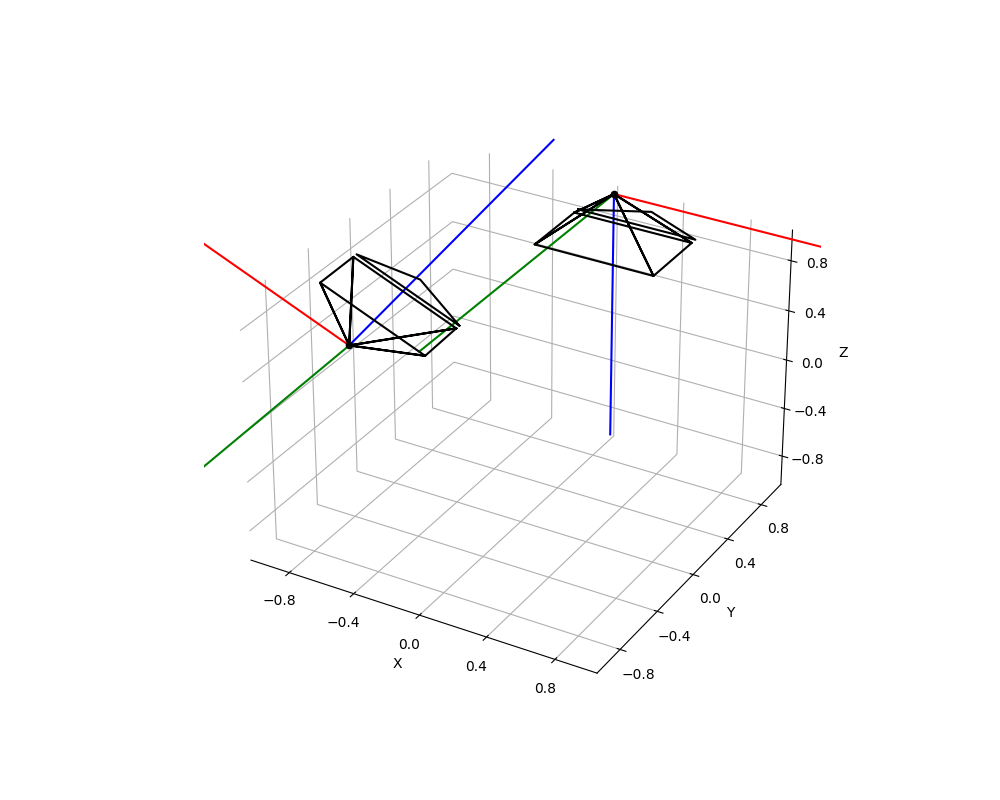

In [12]:
# ================
# Camera Transform
# ================

# We can see the camera frame and the world frame. There is a grid of points from
# which we know the world coordinates. If we know the location and orientation of
# the camera in the world, we can easily compute the location of the points on
# the image.
# """
print(__doc__)

# if you want to work with the plot enable the widget
%matplotlib widget


# https://dfki-ric.github.io/pytransform3d/camera.html


import numpy as np
import matplotlib.pyplot as plt
import pytransform3d.camera as pc
import pytransform3d.transformations as pt


# 4x4 homogeneuos coordintate R*t  - camera 2
Rt = np.array( [  [-0.85645138, 0.15374493, 0.49280172, -0.98446641],
                 [-0.0415684, -0.97206015, 0.23102194, -0.1283676],
                 [ 0.51455137, 0.17737408, 0.83891318, 0.11978165],
                 [0., 0., 0., 1.] ]
                 )

# camera 1 has the world coordinate
cam1world = pt.transform_from_pq([0, 1, 1, np.sqrt(0), -np.sqrt(1), 0, 0])
# default parameters of a camera in Blender
sensor_size = np.array([0.091, 0.055])
intrinsic_matrix = np.array([
    [0.05, 0, sensor_size[0] / 2.0],
    [0, 0.05, sensor_size[1] / 2.0],
    [0, 0, 1]
])

virtual_image_distance = 0.4

# define axis and figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111,projection='3d')
# set limits
ax.set(xlim=(-2, 2), ylim=(-2, 2), zlim=(-2, 2))

# first axis define first the axis
ax = pt.plot_transform(A2B=cam1world, s=2)
ax = pt.plot_transform(A2B=Rt, s=2)

# plot the cameras
pc.plot_camera(
    ax, cam2world=Rt, M=intrinsic_matrix, sensor_size=sensor_size,
    virtual_image_distance=virtual_image_distance)

pc.plot_camera(
    ax, cam2world=cam1world, M=intrinsic_matrix, sensor_size=sensor_size,
    virtual_image_distance=virtual_image_distance)

plt.show()

In [7]:
# 4x4 homogeneuos coordintate

t =  [[-0.98446641],
 [-0.1283676 ],
 [ 0.11978165]]

R = np.array( [  [-0.85645138, 0.15374493, 0.49280172, -0.98446641],
                 [-0.0415684, -0.97206015, 0.23102194, -0.1283676],
                 [ 0.51455137, 0.17737408, 0.83891318, 0.11978165],
                 [0., 0., 0., 1.] ]
                 )
print('R\n', R)
print('_R\n',-R)

R
 [[-0.85645138  0.15374493  0.49280172 -0.98446641]
 [-0.0415684  -0.97206015  0.23102194 -0.1283676 ]
 [ 0.51455137  0.17737408  0.83891318  0.11978165]
 [ 0.          0.          0.          1.        ]]
_R
 [[ 0.85645138 -0.15374493 -0.49280172  0.98446641]
 [ 0.0415684   0.97206015 -0.23102194  0.1283676 ]
 [-0.51455137 -0.17737408 -0.83891318 -0.11978165]
 [-0.         -0.         -0.         -1.        ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.plot_utils import make_3d_axis
from pytransform3d.rotations import active_matrix_from_intrinsic_euler_xyz
from pytransform3d.transformations import transform_from, plot_transform
from pytransform3d.camera import make_world_grid, world2image, plot_camera

cam2world = transform_from(
    active_matrix_from_intrinsic_euler_xyz([-np.pi + 1, -0.1, 0.3]),
    [0.2, -1, 0.5])
focal_length = 0.0036
sensor_size = (0.00367, 0.00274)
image_size = (640, 480)
intrinsic_camera_matrix = np.array([
    [focal_length, 0, sensor_size[0] / 2],
    [0, focal_length, sensor_size[1] / 2],
    [0, 0, 1]
])
